In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-sales-dataset/pizza_sales.csv


In [2]:
pizza_data = pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')
pizza_data.tail(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620.0,21350.0,bbq_ckn_s,1.0,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [3]:
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [4]:
pizza_data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [5]:
# Lets check first how our values are distribuited between each column.
for i in pizza_data.columns:
    print(f"{i}: {pizza_data[i].nunique()}")
      

pizza_id: 48620
order_id: 21350
pizza_name_id: 91
quantity: 4
order_date: 358
order_time: 16382
unit_price: 25
total_price: 56
pizza_size: 5
pizza_category: 4
pizza_ingredients: 32
pizza_name: 32


In [6]:
pizza_data.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
list(pizza_data.columns)

['pizza_id',
 'order_id',
 'pizza_name_id',
 'quantity',
 'order_date',
 'order_time',
 'unit_price',
 'total_price',
 'pizza_size',
 'pizza_category',
 'pizza_ingredients',
 'pizza_name']

In [8]:
cols = ['pizza_name_id','order_date','pizza_size','pizza_category','pizza_name','total_price']
df_pz = pizza_data[cols]
df_pz 

,pizza_name_id,order_date,pizza_size,pizza_category,pizza_name,total_price
0,hawaiian_m,1/1/2015,M,Classic,The Hawaiian Pizza,13.25
1,classic_dlx_m,1/1/2015,M,Classic,The Classic Deluxe Pizza,16.00
2,five_cheese_l,1/1/2015,L,Veggie,The Five Cheese Pizza,18.50
3,ital_supr_l,1/1/2015,L,Supreme,The Italian Supreme Pizza,20.75
4,mexicana_m,1/1/2015,M,Veggie,The Mexicana Pizza,16.00
...,...,...,...,...,...,...
48615,ckn_alfredo_m,31-12-2015,M,Chicken,The Chicken Alfredo Pizza,16.75
48616,four_cheese_l,31-12-2015,L,Veggie,The Four Cheese Pizza,17.95
48617,napolitana_s,31-12-2015,S,Classic,The Napolitana Pizza,12.00
48618,mexicana_l,31-12-2015,L,Veggie,The Mexicana Pizza,20.25


In [9]:
# Grouping by 'pizza_name', 'pizza_category', and 'pizza_size', then counting occurrences
pizza_grouped_counts = df_pz.groupby(['pizza_name', 'pizza_category', 'pizza_size']).size()

# Reformatting the result for better visualization
# 'unstack' transforms the last level of grouping ('pizza_size') into columns in the resulting DataFrame
pizza_grouped_counts = pizza_grouped_counts.unstack(level=-1, fill_value=0)
pizza_grouped_counts['Total'] = pizza_grouped_counts.sum(axis=1)
pizza_grouped_counts = pizza_grouped_counts.sort_values(by=['pizza_category', 'Total'],  ascending=[True,False])



In [10]:
pizza_grouped_counts

,pizza_size,L,M,S,XL,XXL,Total
pizza_name,pizza_category,,,,,,
The Barbecue Chicken Pizza,Chicken,967,926,479,0,0,2372
The Thai Chicken Pizza,Chicken,1365,474,476,0,0,2315
The California Chicken Pizza,Chicken,895,914,493,0,0,2302
The Southwest Chicken Pizza,Chicken,993,526,366,0,0,1885
The Chicken Alfredo Pizza,Chicken,187,697,96,0,0,980
The Chicken Pesto Pizza,Chicken,392,274,295,0,0,961
The Classic Deluxe Pizza,Classic,471,1159,786,0,0,2416
The Hawaiian Pizza,Classic,896,473,1001,0,0,2370
The Pepperoni Pizza,Classic,712,918,739,0,0,2369


In [11]:
df_pz['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

<Axes: xlabel='pizza_category', ylabel='count'>

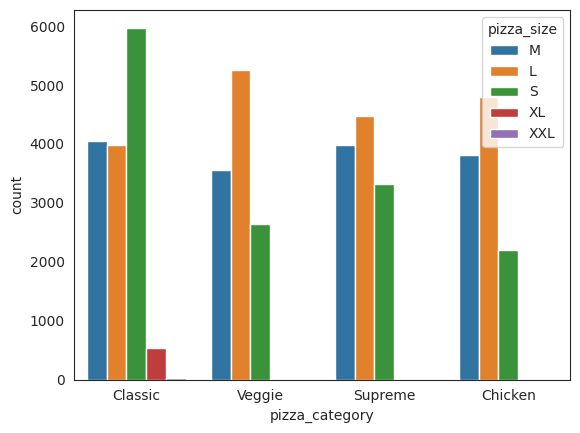

In [12]:

sns.countplot(data=df_pz, x='pizza_category', hue = 'pizza_size')

# **Toppings X Size Charts**

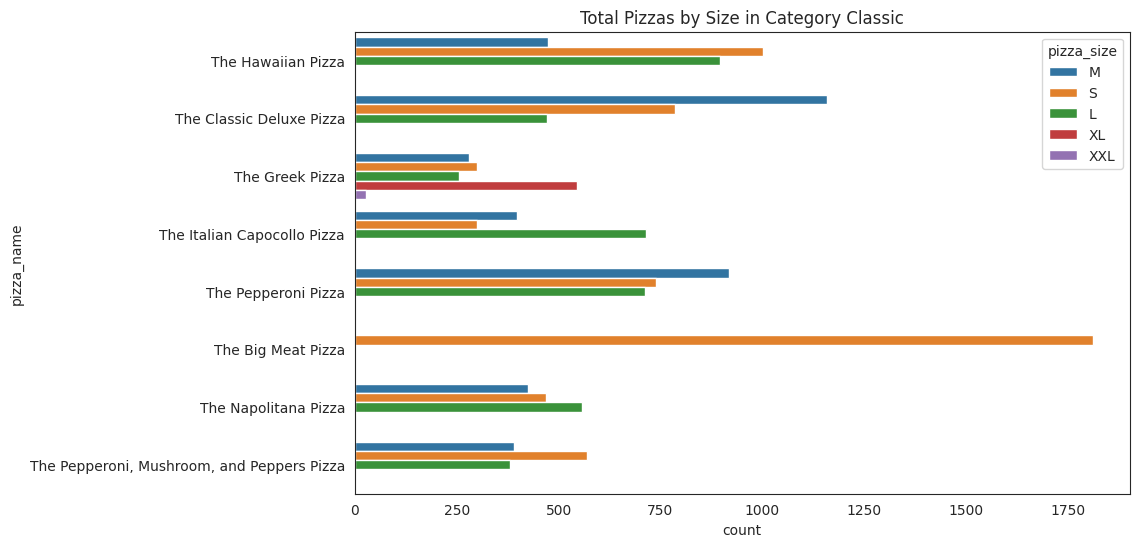

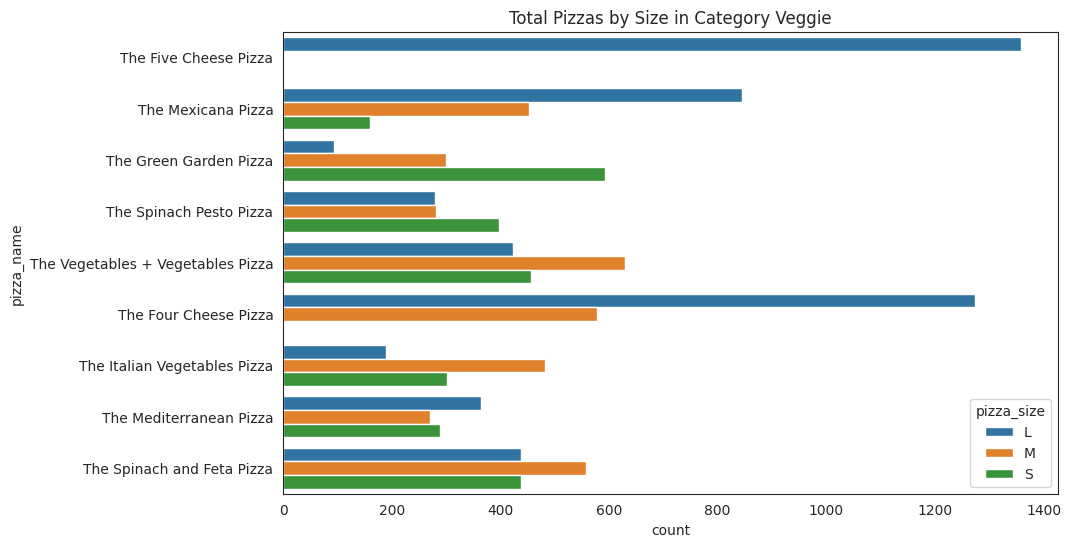

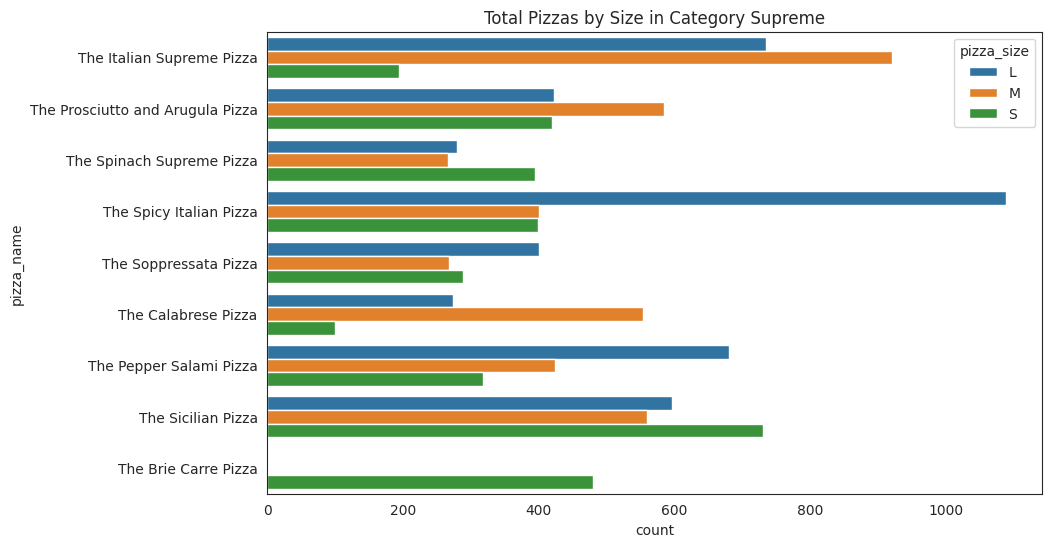

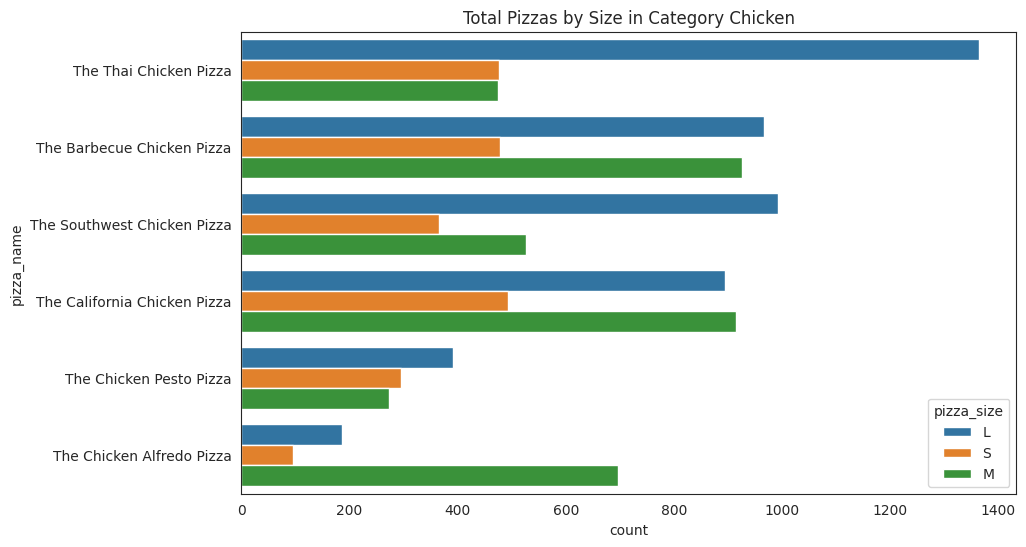

In [13]:
categories = df_pz['pizza_category'].unique()

for category in categories:
    # Filtering df_pz for the current category
    cat_pizza = df_pz[df_pz['pizza_category'] == category]

    plt.figure(figsize=(10, 6))

    # Creating the bar chart for the current category with 'pizza_name' on the Y-axis
    sns.countplot(data=cat_pizza, y='pizza_name', hue='pizza_size')

    # Adding a title to the chart
    plt.title(f'Total Pizzas by Size in Category {category}')

    plt.show()


# **Calculate the total ingredients used in each pizza**

In [14]:
# Calculate the total ingredients used in each pizza

frequency = {}

for row in pizza_data['pizza_ingredients'].str.split(','):
    for ingredient in row:
        if ingredient in frequency:
            frequency[ingredient] += 1
        else:
            frequency[ingredient] = 1


ingredient_df = pd.DataFrame.from_dict([frequency]).T.sort_values(by=0, ascending=False).head(10)

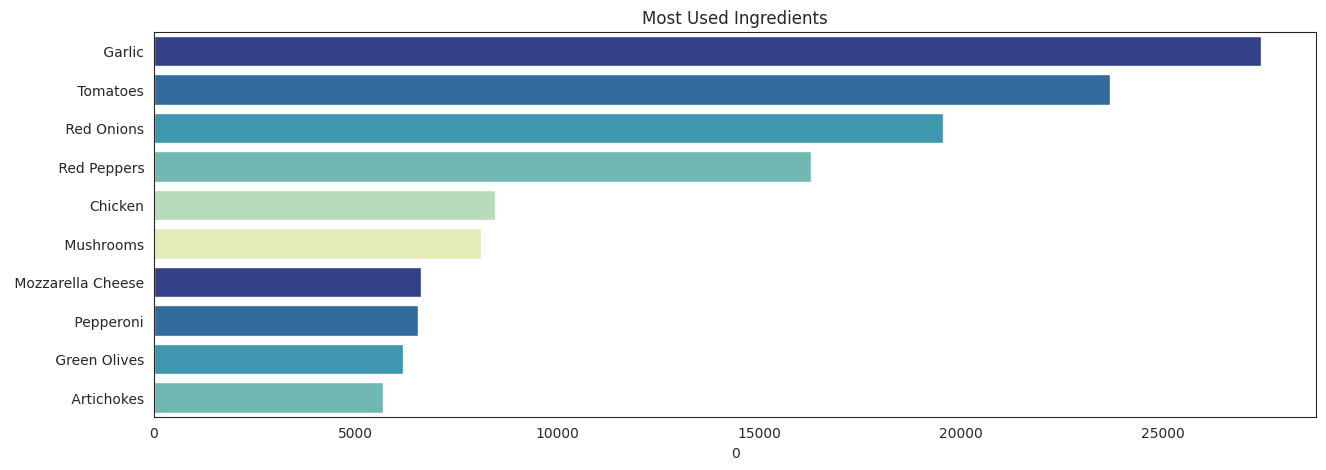

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(data = ingredient_df, x=0, y=ingredient_df.index, palette=sns.color_palette("YlGnBu_r"))
plt.title("Most Used Ingredients")
plt.show()

# **Sales by hour of the day**

In [16]:
pizza_data['order_time']=pizza_data['order_time'].astype('string')
pizza_data[['Hour','Minute', 'Second']]= pizza_data['order_time'].str.split(":",expand=True)
pizza_data["Hour"].value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: Int64

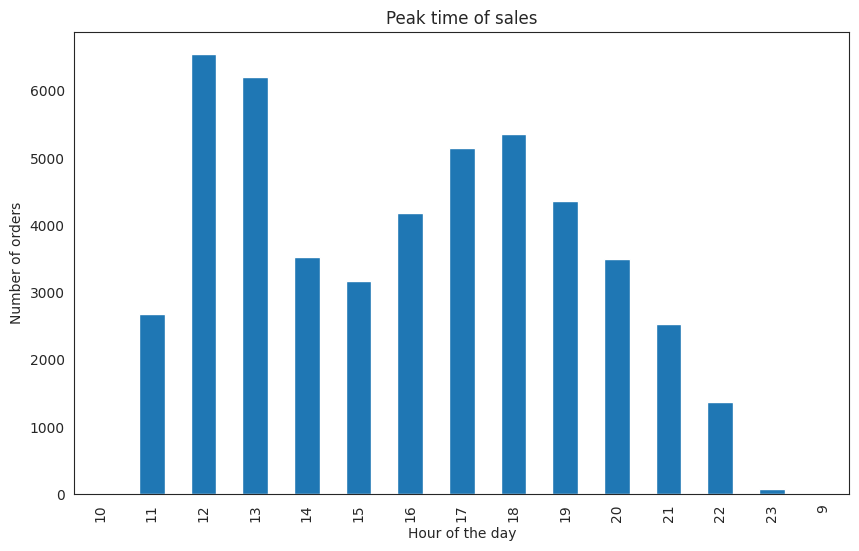

In [17]:
# Sales by hour of the day
plt.figure(figsize=(10,6))

pizza_data['Hour'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Hour of the day')

plt.ylabel('Number of orders')

plt.title('Peak time of sales')

plt.show()

In [18]:
pizza_data['order_year'] =pd.DatetimeIndex( pizza_data['order_date']).year
pizza_data['order_year'].value_counts()

order_year
2015    48620
Name: count, dtype: int64

In [19]:
pizza_data['order_dates'] =pd.DatetimeIndex( pizza_data['order_date']).day_name()

In [20]:
pizza_data['order_dates'].value_counts().sort_values()

order_dates
Sunday       6063
Monday       6577
Tuesday      6833
Wednesday    6907
Thursday     7243
Saturday     7274
Friday       7723
Name: count, dtype: int64

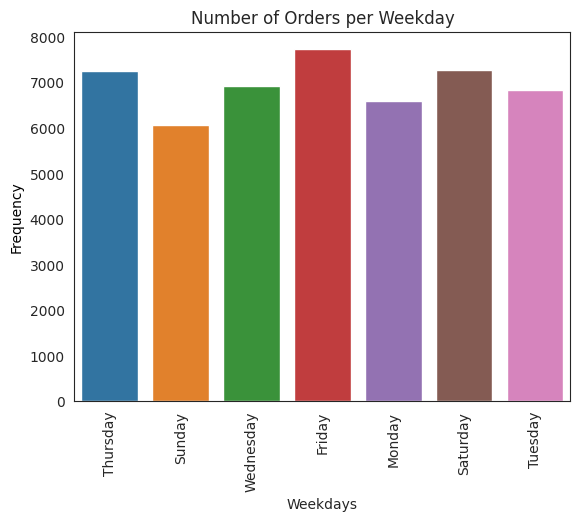

In [21]:
sns.countplot(data=pizza_data,x="order_dates")
plt.xticks(rotation=90)
plt.xlabel("Weekdays",fontsize=10)
plt.ylabel("Frequency",fontsize=10,color="Black")
plt.title("Number of Orders per Weekday")
plt.show()

In [22]:
pizza_data['order_month'] =pd.DatetimeIndex (pizza_data['order_date']).month
pizza_data.loc[(pizza_data['order_month'] ==1), 'order_month'] = 'January'
pizza_data.loc[(pizza_data['order_month'] ==2), 'order_month'] = 'February'
pizza_data.loc[(pizza_data['order_month'] ==3), 'order_month'] = 'March'
pizza_data.loc[(pizza_data['order_month'] ==4), 'order_month'] = 'April'
pizza_data.loc[(pizza_data['order_month'] ==5), 'order_month'] = 'May'
pizza_data.loc[(pizza_data['order_month'] ==6), 'order_month'] = 'June'
pizza_data.loc[(pizza_data['order_month'] ==7), 'order_month'] = 'July'
pizza_data.loc[(pizza_data['order_month'] ==8), 'order_month'] = 'August'
pizza_data.loc[(pizza_data['order_month'] ==9), 'order_month'] = 'September'
pizza_data.loc[(pizza_data['order_month'] ==10), 'order_month'] = 'October'
pizza_data.loc[(pizza_data['order_month'] ==11), 'order_month'] = 'November'
pizza_data.loc[(pizza_data['order_month'] ==12), 'order_month'] = 'December'
pizza_data['order_month'].value_counts()

order_month
January      4288
March        4251
November     4226
July         4212
April        4182
August       4141
October      4045
June         4044
May          4008
February     3821
September    3780
December     3622
Name: count, dtype: int64

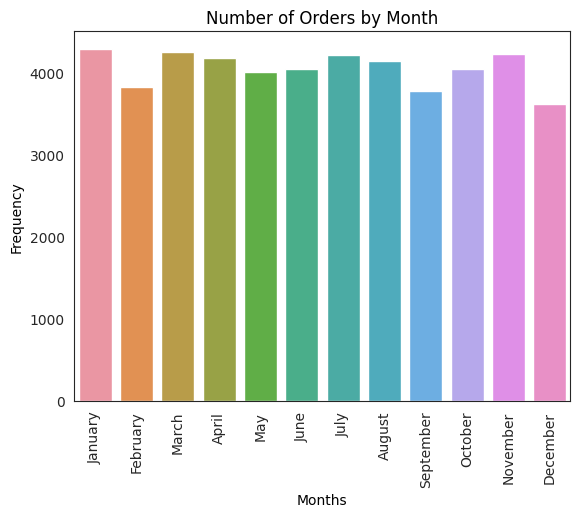

In [23]:
sns.countplot(data=pizza_data,x="order_month")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Number of Orders by Month",color="black")
plt.show()

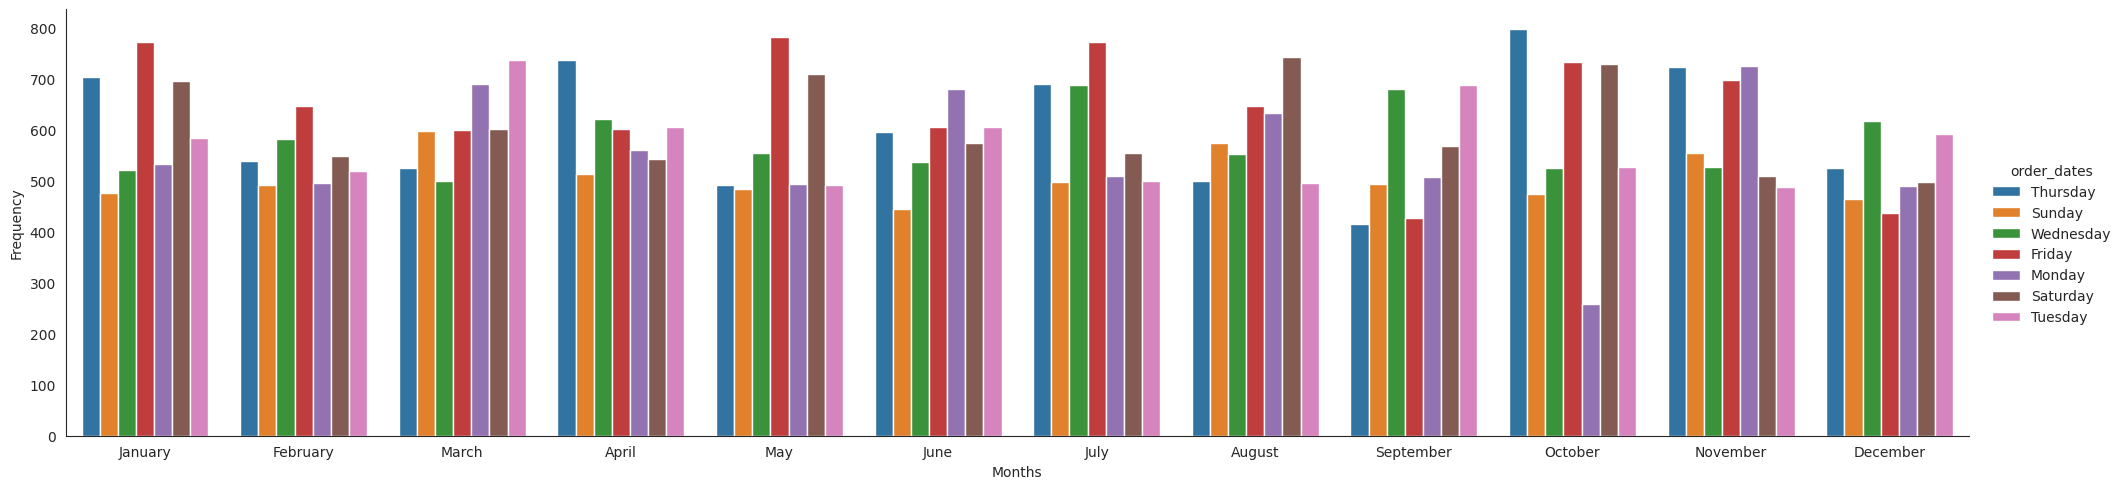

In [24]:
with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=pizza_data, aspect=4.0, kind='count',hue='order_dates')
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

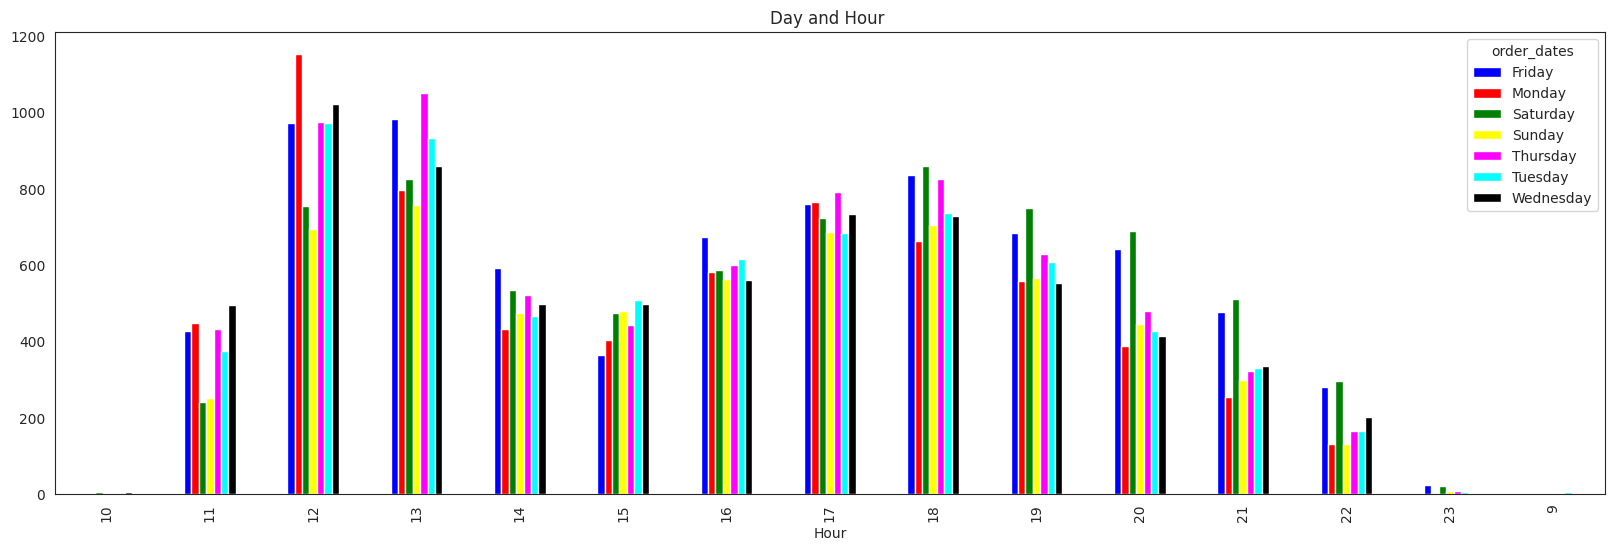

In [25]:
pd.crosstab(pizza_data["Hour"], pizza_data["order_dates"]).plot(kind="bar", figsize=(20, 6),
                                                color=["blue","red","green","yellow","magenta","cyan","black","orange"],
                                                title="Day and Hour ")
plt.show()